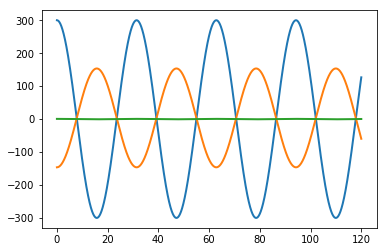

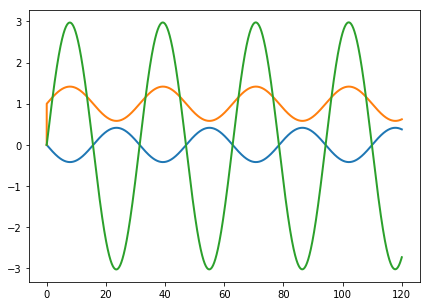

In [62]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.integrate import odeint

%matplotlib inline 

class Battery():
    """The class describes a simple battery model based on Shepherds model.
    It uses a simple thevenins equivalent for battery. Needs internal resistance and open ciruit voltage
    
    Needs parameters 
    ri - internal resistance of battery in p.u
    idc - battery current - Charging current is negative and discharging current is positive
    voc - take open circuit voltage
    
    methods: 
    
    finding vdc for current use name.vdc
    function for differentaition of battery state
    finding soc uses name.soc
    
    """
    def __init__(self,ri,idc,voc,t):
        self.resistance_in = ri
        self.voltage_open = voc
        self.idc = idc
        self.Tm = 500.0
        self.n = t
    
    def dSOC(self,y,t,i):
        qe = y[0]
        im = y[1]
        self.idc = i
        """Returns the actual battery voltage"""
        dqe = self.idc/3600
        dim = (self.idc - self.im)/self.Tm
        return(dqe,dim)
        
    def SOC(self,q0,i,dt,C):
        """
        Computes SOC based on the simple integration "Backward difference" 
        
        needs following values
        
        q0 - [old charge, old current]
        i  - the actual dc current 
        dt - time step in seconds 
        C   - Capacity in Ampere hours 
        
        Since i*dt will be in Ampere-sec, we will need to convert it to Amp-hours 
        1 [hr]/3600[sec], we get dt[sec]/3600[sec] will be in hours  
        qe - will be in A-h,
        
        SOC normalized will be 1-qe/C
        
        
        """
        self.q0 = q0[0]
        self.im = q0[1]
        self.idc = i
        self.dt = dt
        self.c  = C
        qe = self.q0 - (self.idc*self.dt)/3600.0
        im = self.im -(self.im*self.dt)/self.Tm  + (self.idc*self.dt)/self.Tm       
        SOC = 1-qe/self.c
        return(qe,im,SOC)
        
    def vdc(self):
        """Returns the battery voltage for a given internal resistance and current
         idc - charging current is negative and discharging current is positive"""
        vdc = self.voltage_open - self.resistance_in*self.idc
        return(vdc)
    
class BatSoc(Battery):
    """Calls methods from battery to calculate the SOC and other variables"""
    def SOC(self):
        y0 = [0.0,0.0]
        n = len(t)
        tt =np.arange(0,len(t),0.01)
        y = odeint(Battery.dSOC,y0,tt)
        SOC = 1-y[0]
        return(SOC)
    
dt = 0.01
tend = 120.0
t=np.arange(0,tend,dt)    
i =  300*np.cos(0.2*t)    
    
lion = Battery(0.5,i,3.6,t)

pl.plot(t,i,t,lion.vdc(),lw=2)

C = 1.0    #A-h of battery

nn1 = np.zeros(len(t))
im1 = np.zeros(len(t))
soc = np.zeros(len(t))
for tt in range(len(t)-1):
    nn1[tt+1] = lion.SOC([nn1[tt],im1[tt]],i[tt],dt,C)[0]
    im1[tt+1] = lion.SOC([nn1[tt],im1[tt]],i[tt],dt,C)[1]
    soc[tt+1] = lion.SOC([nn1[tt],im1[tt]],i[tt],dt,C)[2]


y0=[0.0,0.0]

#y = odeint(lion.dSOC(),y0,t,args=(t,i))
pl.plot(t,lion.dSOC(y0,t,i)[1],lw=2)

pl.figure(2,figsize=(7,5))
pl.plot(t,nn1,lw=2)
pl.plot(t,soc,lw=2)
pl.plot(t,im1,lw=2)